# 201600779 김영민

In [1]:
import re, math, random # regexes, math functions, random numbers
import matplotlib.pyplot as plt # pyplot
from collections import defaultdict, Counter
from functools import partial, reduce # For python3, "reduce" function is added

import numpy as np

def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

v = [x for x in range(1, 11, 2)]
w = [y for y in range(11, 21, 2)]

vector_add(v, w)


[12, 16, 20, 24, 28]

In [2]:
np.array(v) + np.array(w)


array([12, 16, 20, 24, 28])

In [3]:
def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

vector_subtract(v, w)


[-10, -10, -10, -10, -10]

In [4]:
np.array(v) - np.array(w)


array([-10, -10, -10, -10, -10])

In [5]:
v = [x for x in range(1, 11, 2)]
w = [y for y in range(11, 21, 2)]

# Version1
def vector_sum(vectors):
    return reduce(vector_add, vectors)

vectors = [v,w,v,w,v,w]
vector_sum(vectors)

# Version2
def vector_sum_modified(vectors):
    return [sum(value) for value in zip(*vectors)]

vectors = [v,w,v,w,v,w]
vector_sum_modified(vectors)

[36, 48, 60, 72, 84]

In [6]:
np.sum([v,w,v,w,v,w], axis=0) 


array([36, 48, 60, 72, 84])

In [7]:
def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

scalar = 3
scalar_multiply(scalar, v)


[3, 9, 15, 21, 27]

In [8]:
scalar * np.array(v)


array([ 3,  9, 15, 21, 27])

In [9]:
def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

v = [1,2,3,4]
w = [-4,-3,-2,-1]

vector_mean([v,v,v,v])


[1.0, 2.0, 3.0, 4.0]

In [10]:
# Numpy version
np.mean([v,v,v,v], axis=0)


array([1., 2., 3., 4.])

In [11]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

v = [1,2,3,4]
w = [-4,-3,-2,-1]

dot(v, w)


-20

In [12]:
np.dot(v,w)

-20

In [13]:
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

v = [1,2,3,4]
sum_of_squares(v) # v * v = [1,4,9,16]


30

In [14]:
# Magnitude (or length)
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

magnitude(v)


5.477225575051661

In [15]:
# Numpy version
np.linalg.norm(v)


5.477225575051661

In [17]:
#original version
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
    return math.sqrt(squared_distance(v, w))

v = [1,2,3,4]
w = [-4,-3,-2,-1]

print(squared_distance(v,w))
print(distance(v,w))

100
10.0


In [18]:
# Numpy version
np.linalg.norm(np.subtract(v,w)) # or np.sqrt(np.sum(np.subtract(v,w)**2))


10.0

In [19]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

def get_row(A, i):
    return A[i]

def get_column(A, j):
    return [A_i[j] for A_i in A]

example_matrix = [[1,2,3,4,5], [11,12,13,14,15], [21,22,23,24,25]]

shape(example_matrix)
get_row(example_matrix, 0)
get_column(example_matrix,3)


[4, 14, 24]

In [20]:
# Numpy version 
np.shape(example_matrix)
example_matrix = np.array(example_matrix)
example_matrix[0] #row slicing
example_matrix[:,3] #row slicing


array([ 4, 14, 24])

In [21]:
def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix 
    whose (i,j)-th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) for j in range(num_cols)]
            for i in range(num_rows)] 

def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0

identity_matrix = make_matrix(5, 5, is_diagonal)

identity_matrix


[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [22]:
# Numpy version
np.identity(5)


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [23]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 	# user 0
                      [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], 	# user 1
                      [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], 	# user 2
                      [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], 	# user 3
                      [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], 	# user 4
                      [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], 	# user 5
                      [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 	# user 6
                      [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 	# user 7
                      [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], 	# user 8
                      [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] 	# user 9

friendships[0][2] == 1 # True, user 0과 2는 친구이다 
friendships[0][8] == 1 # False, user 0과 8은 친구가 아니다

# only need # to look at # one row
friends_of_five = [i for i, is_friend in enumerate(friendships[5]) if is_friend]
print(friends_of_five)


[4, 6, 7]


In [24]:
def matrix_add(A, B):
    if shape(A) != shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")
        
    num_rows, num_cols = shape(A)
    def entry_fn(i, j): return A[i][j] + B[i][j]
        
    return make_matrix(num_rows, num_cols, entry_fn)

A = [[ 1., 0., 0.], [ 0., 1., 2.]]
B = [[ 5., 4., 3.], [ 2., 2., 2.]]

matrix_add(A,B)



[[6.0, 4.0, 3.0], [2.0, 3.0, 4.0]]

In [25]:
# Numpy version
np.add(A,B) # vector 마찬가지로 크기 같은 matrix 형태의 list가 돌아오면 자동으로 변환함


array([[6., 4., 3.],
       [2., 3., 4.]])

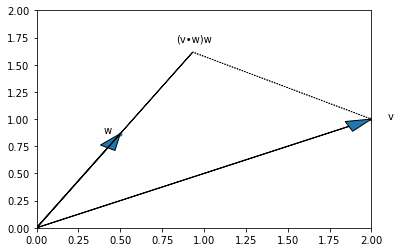

In [26]:
def make_graph_dot_product_as_vector_projection(plt):
    v = [2, 1]
    w = [math.sqrt(.25), math.sqrt(.75)]
    c = dot(v, w)
    vonw = scalar_multiply(c, w)
    o = [0,0]

    plt.arrow(0, 0, v[0], v[1], 
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("v", v, xytext=[v[0] + 0.1, v[1]])
    plt.arrow(0 ,0, w[0], w[1], 
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("w", w, xytext=[w[0] - 0.1, w[1]])
    plt.arrow(0, 0, vonw[0], vonw[1], length_includes_head=True)
    plt.annotate(u"(v•w)w", vonw, xytext=[vonw[0] - 0.1, vonw[1] + 0.1])
    plt.arrow(v[0], v[1], vonw[0] - v[0], vonw[1] - v[1], 
              linestyle='dotted', length_includes_head=True)
    plt.scatter(*zip(v,w,o),marker='.')
    plt.axis([0,2,0,2]) # 잘리는 부분이 있어서 변경
    plt.show()

%matplotlib inline
make_graph_dot_product_as_vector_projection(plt)


# DOT

## Real Coding

In [27]:
A = [[1,2,3],[4,5,6]]
B = [[1,2],[3,4],[5,6]]

In [29]:
def zeros_matrix(rows, cols):

    M = []
    while len(M) < rows:
        M.append([])
        while len(M[-1]) < cols:
            M[-1].append(0.0)
 
    return M

In [30]:
def dot(A, B):

    rowsA = len(A)
    colsA = len(A[0])
    rowsB = len(B)
    colsB = len(B[0])
    if colsA != rowsB:
        raise ArithmeticError('Number of A columns must equal number of B rows.')
 

    C = zeros_matrix(rowsA, colsB)
    for i in range(rowsA):
        for j in range(colsB):
            total = 0
            for ii in range(colsA):
                total += A[i][ii] * B[ii][j]
            C[i][j] = total
 
    return C

In [31]:
dot(A,B)

[[22, 28], [49, 64]]

## Numpy Version

In [32]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

# Transpose

## Real Code

In [33]:
def transpose(M):


    if not isinstance(M[0],list):
        M = [M]
 

    rows = len(M)
    cols = len(M[0])
 

    MT = zeros_matrix(cols, rows)
 

    for i in range(rows):
        for j in range(cols):
            MT[j][i] = M[i][j]
 
    return MT

In [34]:
transpose(A)

[[1, 4], [2, 5], [3, 6]]

In [35]:
transpose(B)

[[1, 3, 5], [2, 4, 6]]

## Numpy version

In [37]:
np.array(A).T

array([[1, 4],
       [2, 5],
       [3, 6]])

In [38]:
np.array(B).T

array([[1, 3, 5],
       [2, 4, 6]])

# 201600779 김영민